# Principal Components Analysis (PCA)

We will perform PCA on the IRIS dataset from scratch and then compare results using sklearn.

Steps are as follows:

1.  Standardize the dataset.
2. Calculate the covariance matrix for the features in the dataset.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Sort eigenvalues and their corresponding eigenvectors.
5. Pick k eigenvalues and form a matrix of eigenvectors.
6. Transform the original matrix ie. recast the data along the principal components axes.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import math

sns.set(style="ticks", color_codes=True, palette="husl")
%matplotlib inline

### Exploratory Data Analysis

In [2]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()
print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#load it into a dataframe
df = pd.DataFrame(data=iris.data)
df['Class'] = iris.target
df['Species'] = iris.target_names[iris.target]
df.head()

,0,1,2,3,Class,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


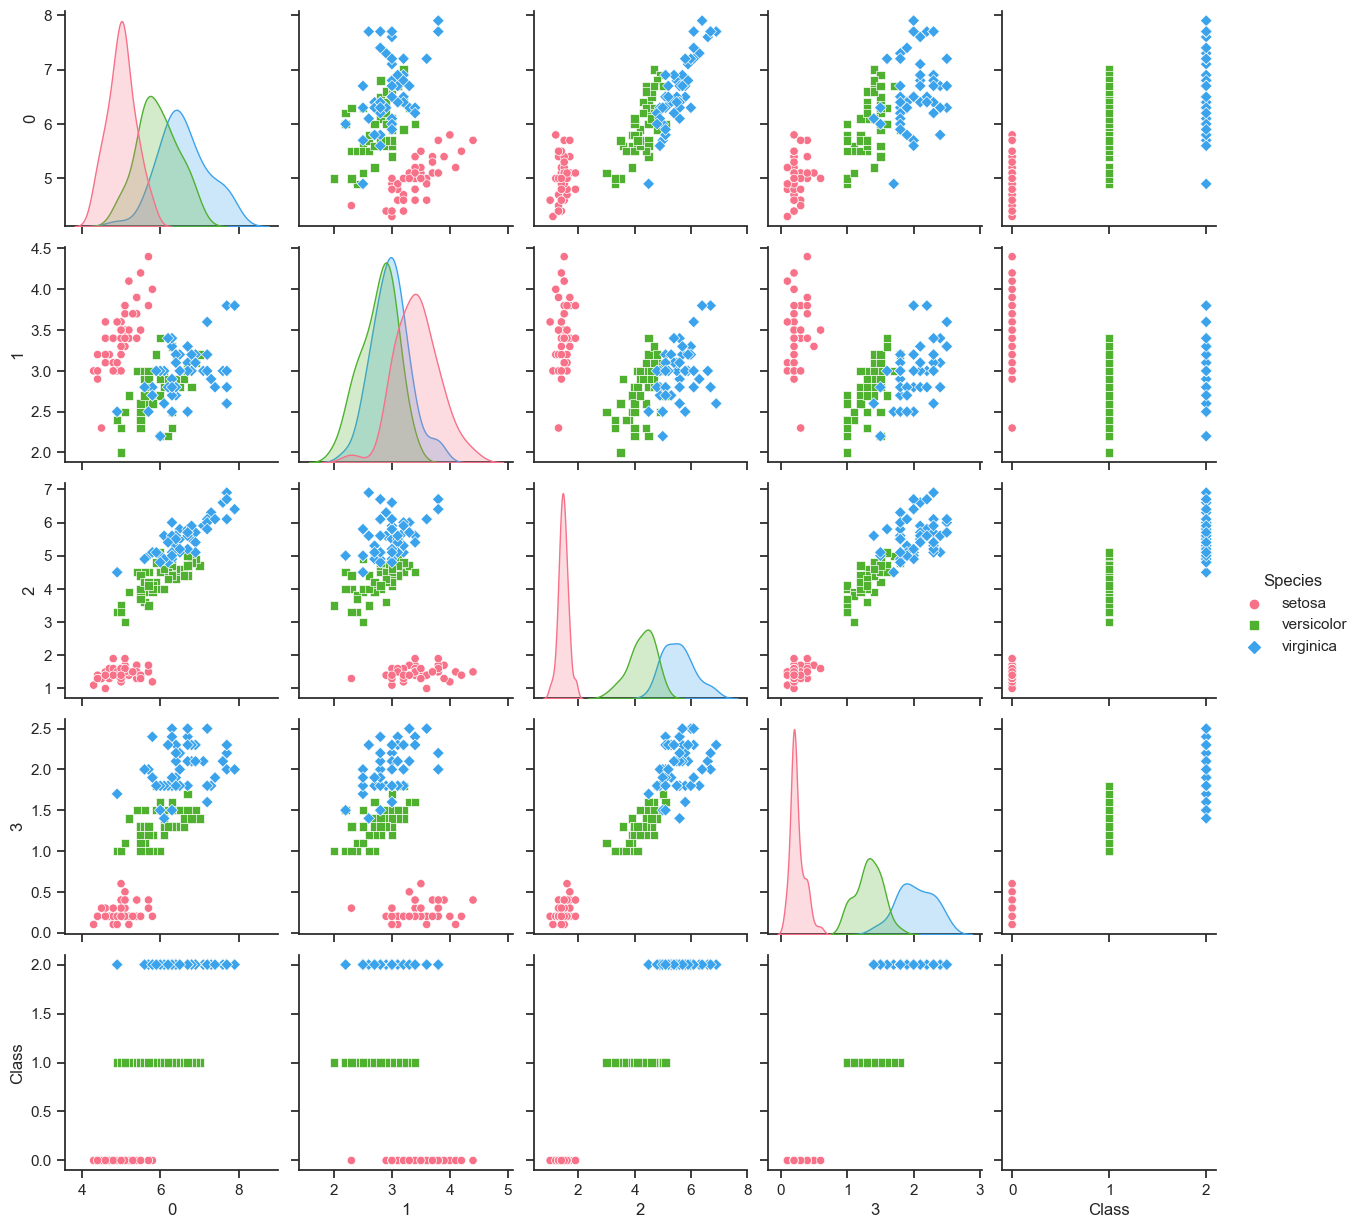

In [5]:
#pairplot
sns.pairplot(df, hue="Species", palette="husl", markers=["o", "s", "D"])

In [6]:
X = iris.data[:, :4]
y = iris.target

In [7]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. Standardize the data

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

*Normalizing the data prior to performing PCA can be important, particularly when the variables have different units or scales*

In [8]:
df_std  = (df - df.mean()) / (df.std())
df_std = df - df.mean()

In [9]:
df_std.head()

,0,1,2,3
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


### 2. Compute Covariance Matrix


The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables


In [10]:
#Default normalization (False) is by (N - 1)
df_cov = np.cov(df_std.T, bias = 1)
df_cov

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [11]:
#Normalization (True) is by (N )
cov_mat = np.cov(df_std.T, bias = 0)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [12]:
## verify variance (f1) is as expected
print('var(f1) (population formula): ',((df_std[0])**2).sum()/150)
print('var(f1) (sample formula): ',((df_std[0])**2).sum()/149)

var(f1) (population formula):  0.6811222222222223
var(f1) (sample formula):  0.6856935123042507


In [13]:
## verify covarinace(f1,f2) is as expected
print('covar(f1,f2) (population formula): ',((df_std[0])*(df_std[1])).sum()/150)
print('covar(f1,f2) (sample formula): ',((df_std[0])*(df_std[1])).sum()/149)

covar(f1,f2) (population formula):  -0.04215111111111111
covar(f1,f2) (sample formula):  -0.04243400447427293


### 3. Compute EigenValue and EigenVectors

SVD decomposes covariance matrix $C$, where $C=XXᵀ/n$, into $C=USVᵀ$, where $S$ is a (rectangle) diagonal matrix containing singular values sᵢ, U is a unitary matrix, and $V$ are principal directions. In terms of a singular value sᵢ, we can use $λᵢ = (sᵢ^2)/n$, where n is the sample size, $λᵢ$ are Eigenvalues.

In [14]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

In [15]:
print(eigen_val)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [16]:
print(eigen_vectors)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


### 4. Sort eigenvalues and their corresponding eigenvectors.

In [17]:
n_components=3

In [18]:
top_eigen_vectors = eigen_vectors[:,:n_components]

In [19]:
top_eigen_vectors

array([[ 0.36138659, -0.65658877, -0.58202985],
       [-0.08452251, -0.73016143,  0.59791083],
       [ 0.85667061,  0.17337266,  0.07623608],
       [ 0.3582892 ,  0.07548102,  0.54583143]])

### 5: Pick k eigenvalues and form a matrix of eigenvectors.

In [20]:
top_eigen_vectors.shape

(4, 3)

In [21]:
np.array(df_std).shape

(150, 4)

### Step 6: Transform the original matrix.

In [22]:
df_std

,0,1,2,3
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [30]:
transformed_data = np.matmul(np.array(df_std),top_eigen_vectors)

In [31]:
transformed_data.shape

(150, 3)

In [32]:
pca_df = pd.DataFrame(data = transformed_data, columns = ['PC '+ str(i+1) for i in range(n_components)])

pca_df.head()

,PC 1,PC 2,PC 3
0,-2.684126,-0.319397,-0.027915
1,-2.714142,0.177001,-0.210464
2,-2.888991,0.144949,0.017900
3,-2.745343,0.318299,0.031559
4,-2.728717,-0.326755,0.090079


### Sklearn API

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=n_components)
pca_fit = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data = pca_fit
             , columns = ['PC '+ str(i+1) for i in range(n_components)])

In [27]:
df_pca

,PC 1,PC 2,PC 3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [28]:
print(pca.singular_values_)

[25.09996044  6.01314738  3.41368064]


### Explained Variance 

The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance

In [29]:
print(pca.explained_variance_)

[4.22824171 0.24267075 0.0782095 ]


In [30]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261]


The first two principal components describe approximately 31% of the variance in the data. 


In order gain a more comprehensive view of how each principal component explains the variance within the data, we will construct a scree plot. A scree plot displays the variance explained by each principal component within the analysis.

#### Scree plot

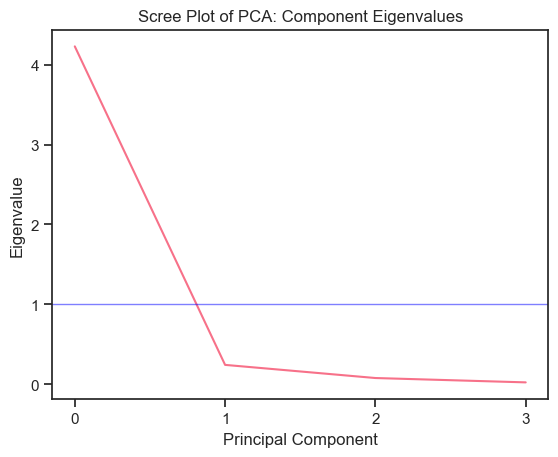

In [45]:
ax = plt.figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='b', alpha=0.5)
plt.title('Scree Plot of PCA: Component Eigenvalues')
plt.show()

### Variance explained

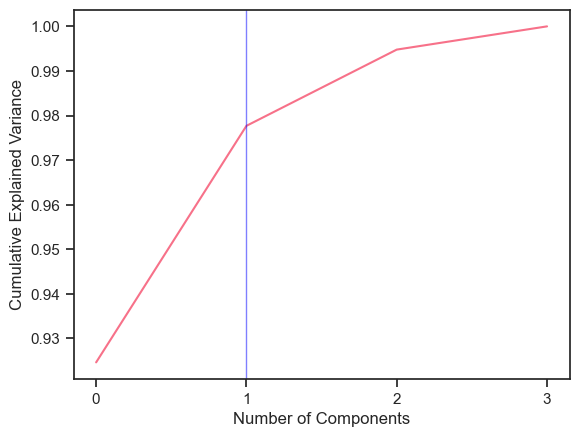

In [44]:
ax = plt.figure().gca()
pca = PCA().fit(df_std)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=1, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### PCA Loadings

Another facet of PCA is examining the component loadings or components. This allows us to see how informative a particular variable is for the principal component. Paying attention to the loadings is particularly useful in scale construction using PCA (or PCA in combination with Cronbach's Alpha and Factor Analysis).

In [47]:
loadings = pca.components_
results = pd.DataFrame(loadings)
results.columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
results.index=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
print(results)

           Component 1  Component 2  Component 3  Component 4
sepal_len     0.361387    -0.084523     0.856671     0.358289
sepal_wid     0.656589     0.730161    -0.173373    -0.075481
petal_len    -0.582030     0.597911     0.076236     0.545831
petal_wid    -0.315487     0.319723     0.479839    -0.753657


### Plot the PCA transformed data

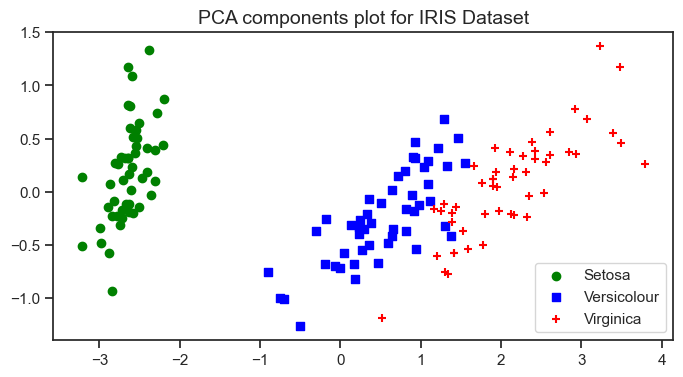

In [33]:
# Create plot from transformed dataset
X_pca = pca.fit(df.iloc[:, 0:4]).transform(df.iloc[:, 0:4])

plt.figure(figsize=(8,4))
plt.scatter(X_pca[0:50,0], X_pca[0:50,1], color='green', marker='o', label='Setosa')
plt.scatter(X_pca[50:100,0], X_pca[50:100,1], color='blue', marker='s', label='Versicolour')
plt.scatter(X_pca[100:150,0], X_pca[100:150,1], color='red', marker='+', label='Virginica')
plt.title("PCA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

## LDA

Create LDA transformed dataset with dimensionality
reduced to 2; n_components = 2

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
lda = LinearDiscriminantAnalysis(n_components=2)
df = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["class"] = iris.target
X_lda = lda.fit(df.iloc[:, 0:4], df.iloc[:, -1]).transform(df.iloc[:, 0:4])

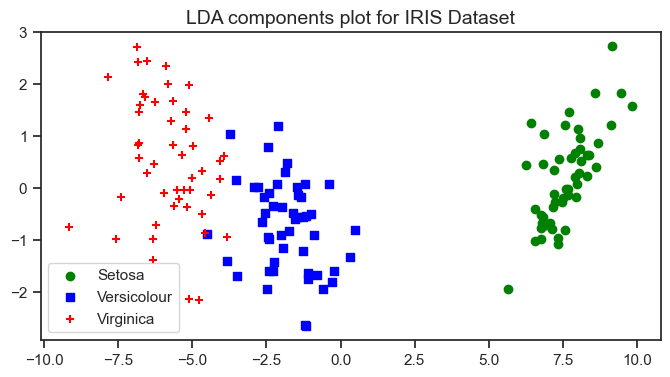

In [36]:
# Create plot from transformed dataset
plt.figure(figsize=(8,4))

plt.scatter(X_lda[0:50,0], X_lda[0:50,1], color='green', marker='o', label='Setosa')
plt.scatter(X_lda[50:100,0], X_lda[50:100,1], color='blue', marker='s', label='Versicolour')
plt.scatter(X_lda[100:150,0], X_lda[100:150,1], color='red', marker='+', label='Virginica')

plt.title("LDA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()